# GROUP 1 (NETFLIX DATA ANALYSIS PROJECT)

In [1]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r"C:\Users\Sameer\OneDrive\Desktop\NETFLIX\mymoviedb.csv", encoding='ISO-8859-1', engine='python')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [21]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [23]:
# exploring genres column
df['Genre'].head()


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [25]:
# check for duplicated rows
df.duplicated().sum()

0

In [27]:
# exploring summary statistics
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


#•	Exploration Summary

•	we have a dataframe consisting of 9827 rows and 9 columns.
•	our dataset looks a bit tidy with no NaNs nor duplicated values.
•	Release_Date column needs to be casted into date time and to extract only the
•	Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
•	there is noticable outliers in Popularity column
•	Vote_Average bettter be categorised for proper analysis.
•	Genre column has comma saperated values and white spaces that needs to be hand


In [30]:
## Data Cleaning

In [32]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [40]:
print(df['Release_Date'].isna().sum())


0


In [42]:
print(df[df['Release_Date'].isna()][['Release_Date']])


Empty DataFrame
Columns: [Release_Date]
Index: []


In [44]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [48]:
df['Release_Date'] = df['Release_Date'].dt.year; df['Release_Date'].dtypes


dtype('float64')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   float64
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), object(7)
memory usage: 691.8+ KB


In [52]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping Overview, Original_Languege and Poster-Url

In [55]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [57]:

# dropping columns and confirming changes 
df.drop(cols, axis = 1, inplace = True) 
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [59]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [69]:
# exploring column
df['Vote_Average'].value_counts()


Vote_Average
6.4          435
6.3          429
6.5          427
6.8          423
6.7          420
            ... 
9.2            1
1.5            1
3.1            1
Animation      1
10.0           1
Name: count, Length: 75, dtype: int64

In [71]:
# dropping NaNs
df.dropna(inplace = True)

# confirming
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [73]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [80]:
# Split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# Explode the lists
df = df.explode('Genre').reset_index(drop=True)

# View the first few rows
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022.0,The Batman,3827.658,1151,8.1,Crime
4,2022.0,The Batman,3827.658,1151,8.1,Mystery


In [82]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  float64 
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  object  
 4   Vote_Average  25792 non-null  object  
 5   Genre         25792 non-null  category
dtypes: category(1), float64(2), object(3)
memory usage: 1.0+ MB


In [88]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551 rows to dig into during our analysis

In [91]:
# setting up seaborn configurations
sns.set_style('whitegrid')


# What is the most frequent genre in the dataset

In [94]:
# showing stats. on genre column
df['Genre'].describe()


count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# DATA VISUALIZATION

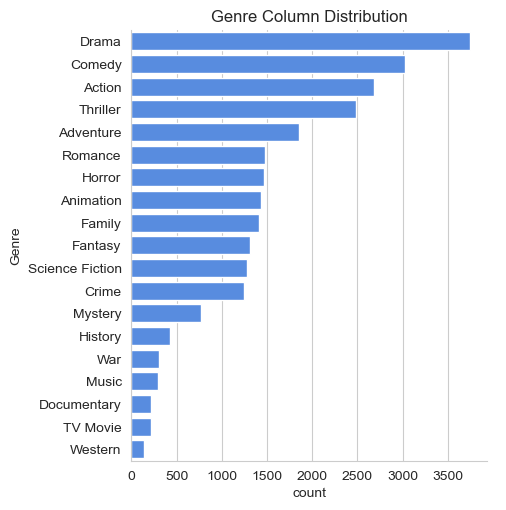

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287f5')
plt.title('Genre Column Distribution')
plt.show()

# What  genres  has highest  votes ?

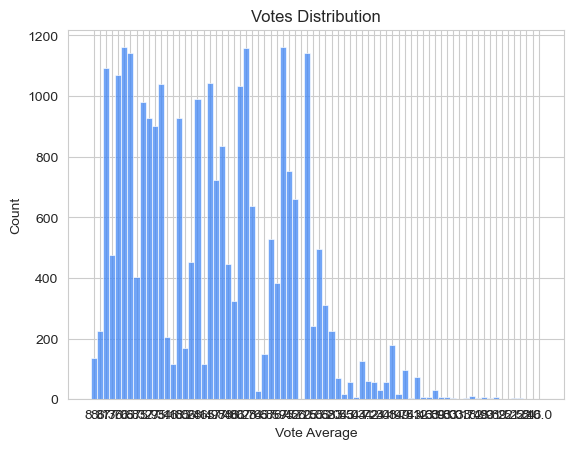

In [103]:
sns.histplot(data=df, x='Vote_Average', bins=20, color='#4287f5')
plt.title('Votes Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()


# Q3: What movie got the highest  popularity ? what's its genre ?


In [106]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


# : What movie got the lowest popularity? what's its genre?

In [109]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,Music
25787,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25788,2021.0,The United States vs. Billie Holiday,13.354,152,6.7,History
25789,1984.0,Threads,13.354,186,7.8,War
25790,1984.0,Threads,13.354,186,7.8,Drama
25791,1984.0,Threads,13.354,186,7.8,Science Fiction


# Q5: Which year has the most filmmed movies?

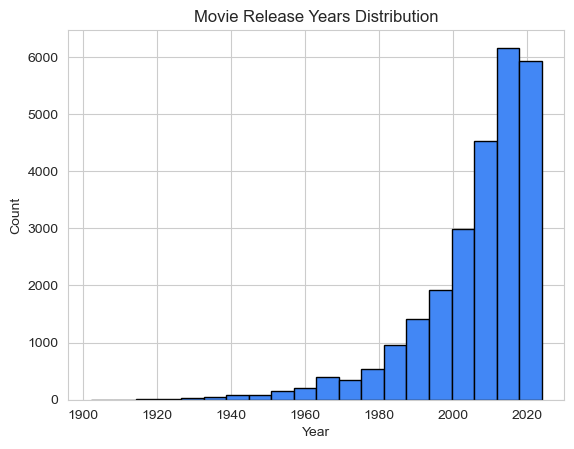

In [114]:
df['Release_Date'].hist(bins=20, color='#4287f5', edgecolor='black')
plt.title('Movie Release Years Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Conclusion

# Q1: What is the most frequent  genre  in the dataset?

# Q2: What  genres  has highest  votes ?

# Q3: What movie got the highest  popularity ? what's its  genre ?

# Q4: What movie got the lowest  popularity ? what's its  genre ?